<a href="https://colab.research.google.com/github/md-rifat-rahman/Ai-Lab-Final-Project/blob/main/Ai_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mount the drive and read the dataset

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive',force_remount=True)


Mounted at /content/gdrive


In [ ]:

import pandas as pd


In [ ]:
train = pd.read_csv('gdrive/My Drive/Colab Notebooks/project/StudentsPerformance.csv');

#Show first 5 rows from dataset

In [ ]:
train.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#Show All Information with missing Value

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#**Shape Of Data**

In [ ]:
train.shape

(1000, 8)

#Show Null Value

In [ ]:
train.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#**Mapping Gender**

In [ ]:
train_test_data =[train]
gender_mapping = {"male": 0, "female": 1} 
for dataset in train_test_data:
     dataset['gender'] = dataset['gender'].map(gender_mapping)

In [ ]:
train.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,group B,bachelor's degree,standard,none,72,72,74
1,1,group C,some college,standard,completed,69,90,88
2,1,group B,master's degree,standard,none,90,95,93
3,0,group A,associate's degree,free/reduced,none,47,57,44
4,0,group C,some college,standard,none,76,78,75


#Import library for data visualization

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [ ]:
def bar_chart(feature):
  male = train[train['gender']==1][feature].value_counts()
  female = train[train['gender']==0][feature].value_counts()
  df = pd.DataFrame([male,female])
  df.index = ['Male','Female']
  df.plot(kind='bar',stacked=True, figsize=(10,5))

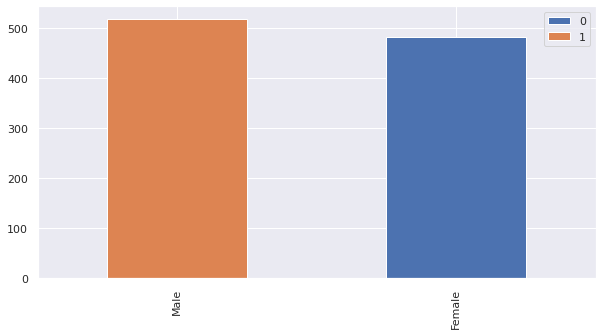

In [ ]:
bar_chart('gender')

In [ ]:
race_ethnicity_mapping = {"group A": 0, "group B": 1, "group C": 2, "group D": 3, "group E": 4} 
for dataset in train_test_data:
     dataset['race/ethnicity'] = dataset['race/ethnicity'].map(race_ethnicity_mapping)

In [ ]:
train.head(20)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,1,bachelor's degree,standard,none,72,72,74
1,1,2,some college,standard,completed,69,90,88
2,1,1,master's degree,standard,none,90,95,93
3,0,0,associate's degree,free/reduced,none,47,57,44
4,0,2,some college,standard,none,76,78,75
5,1,1,associate's degree,standard,none,71,83,78
6,1,1,some college,standard,completed,88,95,92
7,0,1,some college,free/reduced,none,40,43,39
8,0,3,high school,free/reduced,completed,64,64,67
9,1,1,high school,free/reduced,none,38,60,50


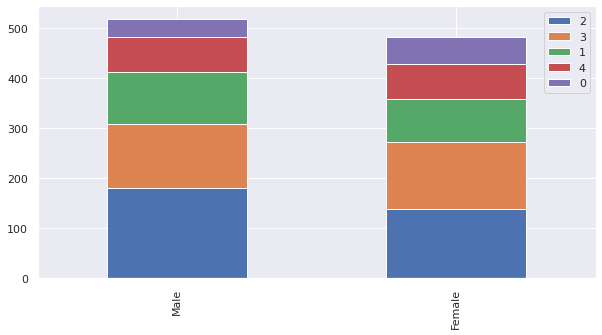

In [ ]:
bar_chart('race/ethnicity')

In [ ]:
parental_level_of_education_mapping = {"high school": 0, "some high school": 1, "some college": 2, "bachelor's degree": 3, "master's degree": 4, "associate's degree": 5}
for dataset in train_test_data:
     dataset['parental level of education'] = dataset['parental level of education'].map(parental_level_of_education_mapping)

In [ ]:
train.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,1,3,standard,none,72,72,74
1,1,2,2,standard,completed,69,90,88
2,1,1,4,standard,none,90,95,93
3,0,0,5,free/reduced,none,47,57,44
4,0,2,2,standard,none,76,78,75


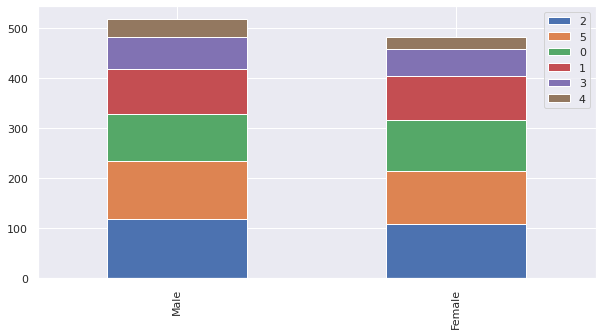

In [ ]:
bar_chart('parental level of education')

#Dropping a column named lunch

In [ ]:
train.drop('lunch', axis=1, inplace=True)

In [ ]:
train.head()

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score
0,1,1,3,none,72,72,74
1,1,2,2,completed,69,90,88
2,1,1,4,none,90,95,93
3,0,0,5,none,47,57,44
4,0,2,2,none,76,78,75


In [ ]:
test_preparation_course_mapping = {"none": 0, "completed": 1} 
for dataset in train_test_data:
     dataset['test preparation course'] = dataset['test preparation course'].map(test_preparation_course_mapping)

In [ ]:
train.head()

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score
0,1,1,3,0,72,72,74
1,1,2,2,1,69,90,88
2,1,1,4,0,90,95,93
3,0,0,5,0,47,57,44
4,0,2,2,0,76,78,75


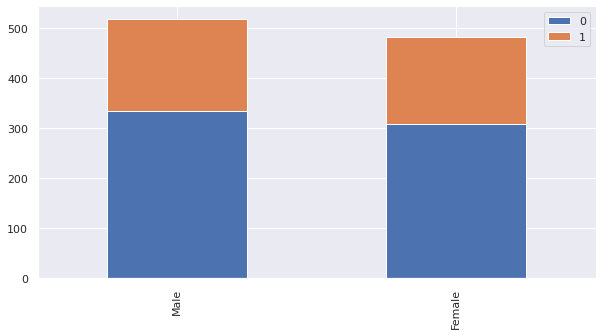

In [ ]:
bar_chart('test preparation course')

In [ ]:
for dataset in train_test_data:
  dataset.loc[ dataset['math score'] <= 32, 'math score'] = 0
  dataset.loc[(dataset['math score'] > 32) & (dataset['math score'] <= 39), 'math score'] = 1
  dataset.loc[(dataset['math score'] > 39) & (dataset['math score'] <= 49), 'math score'] = 2
  dataset.loc[(dataset['math score'] > 49) & (dataset['math score'] <= 59), 'math score'] = 3
  dataset.loc[(dataset['math score'] > 59) & (dataset['math score'] <= 69), 'math score'] = 4
  dataset.loc[(dataset['math score'] > 69) & (dataset['math score'] <= 79), 'math score'] = 5
  dataset.loc[ dataset['math score'] > 79, 'math score'] = 6

In [ ]:
train.head()

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score
0,1,1,3,0,5,72,74
1,1,2,2,1,4,90,88
2,1,1,4,0,6,95,93
3,0,0,5,0,2,57,44
4,0,2,2,0,5,78,75


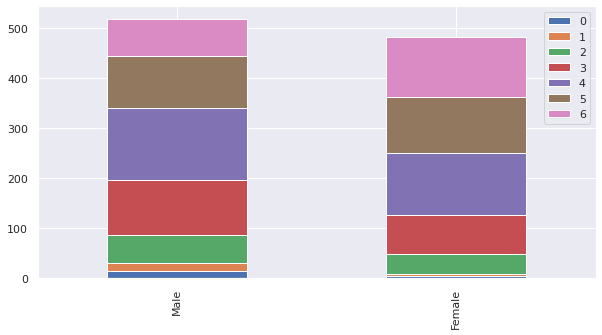

In [ ]:
bar_chart('math score')

In [ ]:
for dataset in train_test_data:
  dataset.loc[ dataset['reading score'] <= 32, 'reading score'] = 0
  dataset.loc[(dataset['reading score'] > 32) & (dataset['reading score'] <= 39), 'reading score'] = 1
  dataset.loc[(dataset['reading score'] > 39) & (dataset['reading score'] <= 49), 'reading score'] = 2
  dataset.loc[(dataset['reading score'] > 49) & (dataset['reading score'] <= 59), 'reading score'] = 3
  dataset.loc[(dataset['reading score'] > 59) & (dataset['reading score'] <= 69), 'reading score'] = 4
  dataset.loc[(dataset['reading score'] > 69) & (dataset['reading score'] <= 79), 'reading score'] = 5
  dataset.loc[ dataset['reading score'] > 79, 'reading score'] = 6

In [ ]:
train.head()

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score
0,1,1,3,0,5,5,74
1,1,2,2,1,4,6,88
2,1,1,4,0,6,6,93
3,0,0,5,0,2,3,44
4,0,2,2,0,5,5,75


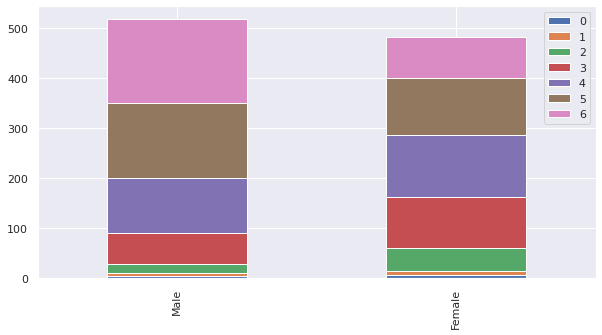

In [ ]:
bar_chart('reading score')

#normalization for writting Score

In [ ]:
for dataset in train_test_data:
  dataset.loc[ dataset['writing score'] <= 32, 'writing score'] = 0
  dataset.loc[(dataset['writing score'] > 32) & (dataset['writing score'] <= 39), 'writing score'] = 1
  dataset.loc[(dataset['writing score'] > 39) & (dataset['writing score'] <= 49), 'writing score'] = 2
  dataset.loc[(dataset['writing score'] > 49) & (dataset['writing score'] <= 59), 'writing score'] = 3
  dataset.loc[(dataset['writing score'] > 59) & (dataset['writing score'] <= 69), 'writing score'] = 4
  dataset.loc[(dataset['writing score'] > 69) & (dataset['writing score'] <= 79), 'writing score'] = 5
  dataset.loc[ dataset['writing score'] > 79, 'writing score'] = 6

In [ ]:
train.head()

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score
0,1,1,3,0,5,5,5
1,1,2,2,1,4,6,6
2,1,1,4,0,6,6,6
3,0,0,5,0,2,3,2
4,0,2,2,0,5,5,5


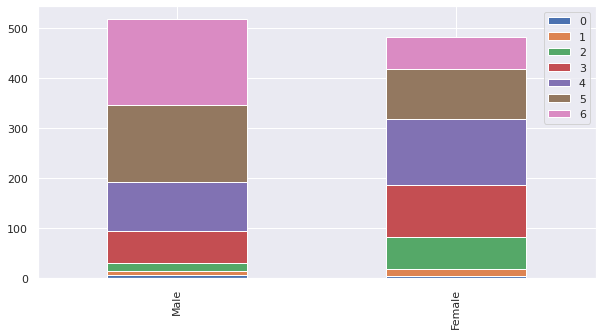

In [ ]:
bar_chart('writing score')

#**Normalization of our dataset**

In [ ]:
train.head()

,gender,race/ethnicity,parental level of education,test preparation course,math score,reading score,writing score
0,1,1,3,0,5,5,5
1,1,2,2,1,4,6,6
2,1,1,4,0,6,6,6
3,0,0,5,0,2,3,2
4,0,2,2,0,5,5,5


#Algorithm part start

#Dividing the dataset

In [ ]:
# (X_TRAIN->train_data, Y_TRAIN->target), X_TEST, Y_TEST
train_data = train.drop('gender', axis=1)
target = train['gender']
train_data.shape, target.shape

((1000, 6), (1000,))

#Splitting the dataset into train and test data

In [ ]:
#Start Confusion Matrix Evaluation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data, target, test_size=.25, random_state=42)
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)
print(y_test)
y_test.value_counts()

X_train:  (750, 6)
X_test:  (250, 6)
y_train:  (750,)
y_test:  (250,)
521    1
737    1
740    0
660    0
411    0
      ..
109    1
430    0
77     0
84     0
286    0
Name: gender, Length: 250, dtype: int64


0    130
1    120
Name: gender, dtype: int64

#**Decision Tree**

In [ ]:
# Importing Classifier Modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

#Performance evaluation

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[103  27]
 [ 31  89]]
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       130
           1       0.77      0.74      0.75       120

    accuracy                           0.77       250
   macro avg       0.77      0.77      0.77       250
weighted avg       0.77      0.77      0.77       250



#Calculating accuracy

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuricy is:")
print(accuracy_score(y_test, y_pred))

Accuricy is:
0.768


#**Random Forest Algorithm**

In [ ]:
# Importing Classifier Modules
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print("Score is:")
print(score)

Score is:
[0.76 0.72 0.8  0.76 0.71 0.73 0.79 0.81 0.78 0.75]
